# Исследование объявлений о продаже квартир

## Общее описание проекта 
В распоряжении данные сервиса о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно изучить влияние различных факторов на рыночную стоимость объектов недвижимости. 

## Описание признакового пространства 
По каждой квартире на продажу доступны следующие признаки. 

|Признак|Описание признака|
|-------------:|:------------|
|airports_nearest|расстояние до ближайшего аэропорта в метрах (м)|
|balcony|число балконов|
|ceiling_height|высота потолков (м)|
|cityCenters_nearest|расстояние до центра города (м)|
|days_exposition| сколько дней было размещено объявление (от публикации до снятия)|
|first_day_exposition|дата публикации|
|floor|этаж|
|floors_total| всего этажей в доме|
|is_apartment|апартаменты (булев тип)|
|kitchen_area|площадь кухни в квадратных метрах (м²)|
|last_price|цена на момент снятия с публикации|
|living_area|жилая площадь в квадратных метрах(м²)|
|locality_name|название населённого пункта|
|open_plan|свободная планировка (булев тип)|
|parks_around3000|число парков в радиусе 3 км|
|parks_nearest|расстояние до ближайшего парка (м)|
|ponds_around3000|число водоёмов в радиусе 3 км|
|ponds_nearest|расстояние до ближайшего водоёма (м)|
|rooms|число комнат|
|studio|квартира-студия (булев тип)|
|total_area|площадь квартиры в квадратных метрах (м²)|
|total_images|число фотографий квартиры в объявлении|

Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

### Импорт библиотек

In [504]:
import pandas as pd
import numpy as np

import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Загружаем данные

In [505]:
df = pd.read_csv('project7.csv', sep = '\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [506]:
df.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [507]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Данные загруженны корректно.

### Проверю, есть ли дублирующие записи в датафрейме

In [509]:
print('Количество дублирующихся записей -- {}. Это составляет -- {:.2%} от общего числа записей.'.
      format(df.duplicated().sum(), df.duplicated().sum()/df.shape[0]))

Количество дублирующихся записей -- 0. Это составляет -- 0.00% от общего числа записей.


### Знакомство с данными

In [510]:
print('Количество строк -- {}, количество колонок -- {}'.
     format(df.shape[0], df.shape[1]))

Количество строк -- 23699, количество колонок -- 22


In [511]:
#df.info()
pd.concat([pd.DataFrame(list(dict_to_rus.values()), index = list(dict_to_rus.keys())), df.info()])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,0
airports_nearest,расстояние до ближайшего аэропорта в метрах (м)
balcony,число балконов
ceiling_height,высота потолков (м)
cityCenters_nearest,расстояние до центра города (м)
days_exposition,сколько дней было размещено объявление (от пуб...
first_day_exposition,дата публикации
floor,этаж
floors_total,всего этажей в доме
is_apartment,апартаменты
kitchen_area,площадь кухни в квадратных метрах (м²)


In [512]:
df_missing = pd.DataFrame(columns=['name', 'count_missig_value', 'pct_missig_value'])
j = 0
for i, col in enumerate(df.columns):
    pct_missing = np.mean(df[col].isnull())
    val_missing = np.sum(df[col].isnull())
    if pct_missing != 0:
        df_missing.loc[j] = [col, val_missing, pct_missing]
        j +=1
print('Сводная таблица по пропускам', '\n', df_missing.sort_values(by='count_missig_value', ascending=False))

Сводная таблица по пропускам 
                    name  count_missig_value  pct_missig_value
3          is_apartment               20924          0.882906
10        parks_nearest               15620          0.659100
12        ponds_nearest               14589          0.615596
5               balcony               11519          0.486054
0        ceiling_height                9195          0.387991
7      airports_nearest                5542          0.233850
8   cityCenters_nearest                5519          0.232879
9      parks_around3000                5518          0.232837
11     ponds_around3000                5518          0.232837
13      days_exposition                3181          0.134225
4          kitchen_area                2278          0.096122
2           living_area                1903          0.080299
1          floors_total                  86          0.003629
6         locality_name                  49          0.002068


array([<AxesSubplot:title={'center':'None'}>], dtype=object)

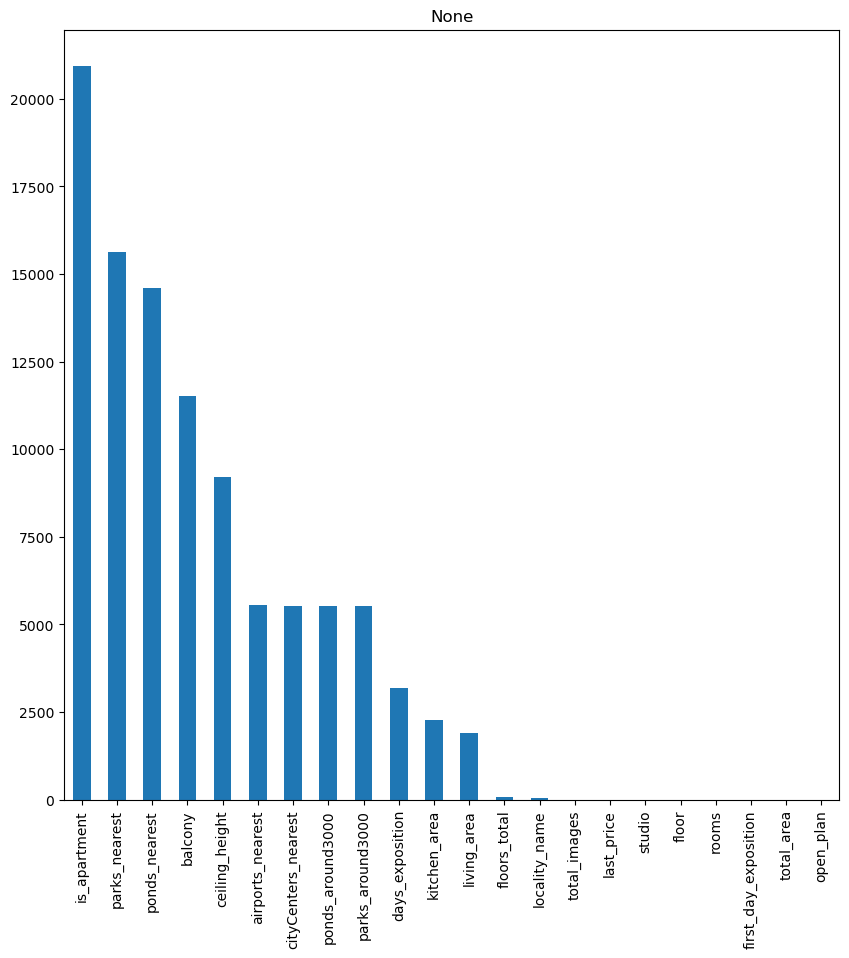

In [513]:
df.isnull().sum().sort_values(ascending = False).plot.bar(subplots=True, figsize=(10, 10))

Комментировать таблицу и график с пропусками пока не имеет смысла, в них только факты и они говорят о том, что с пропусками придется повозиться. 

#### `locality_name` (название населённого пункта)

In [514]:
df['locality_name'].value_counts()

Санкт-Петербург                    15721
посёлок Мурино                       522
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: locality_name, Length: 364, dtype: int64

In [515]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')
df['locality_name'] = df['locality_name'].str.replace('Ё', 'Е')
df['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

Видим, что в названии некоторых населенных пунктов, типы населенных пунктов содержат смысловые синонимы:

поселок <--- городской поселок, городского типа, городской, коттеджный

деревня (деревень больше) <--- село

садовое товарищество <--- садоводческое некоммерческое товарищество

В целях унификации проведем замену.

In [516]:
df['locality_name'] = df['locality_name'].str.replace('городской ', '')
df['locality_name'] = df['locality_name'].str.replace(' городского типа', '')
df['locality_name'] = df['locality_name'].str.replace('коттеджный ', '')
df['locality_name'] = df['locality_name'].str.replace(' при железнодорожной', '')
df['locality_name'] = df['locality_name'].str.replace('садоводческое некоммерческое', 'садовое')
df['locality_name'] = df['locality_name'].str.replace('село ', 'деревня ')
df['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'деревня Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зел

In [517]:
df['locality_name'].value_counts()

Санкт-Петербург                    15721
поселок Мурино                       556
поселок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
деревня Пельгора                       1
поселок Каложицы                       1
поселок Платформа 69-й километр        1
поселок Почап                          1
поселок Дзержинского                   1
Name: locality_name, Length: 319, dtype: int64

In [518]:
df['locality_name'] = df['locality_name'].fillna('Санкт-Петербург')

In [519]:
df['locality_name'].value_counts()

Санкт-Петербург                    15770
поселок Мурино                       556
поселок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
деревня Пельгора                       1
поселок Каложицы                       1
поселок Платформа 69-й километр        1
поселок Почап                          1
поселок Дзержинского                   1
Name: locality_name, Length: 319, dtype: int64

#### `floors_total` (всего этажей в доме)

In [520]:
df[['floors_total', 'floor']].value_counts()

floors_total  floor
5.0           5        1275
              4        1155
              2        1147
              3        1109
              1        1102
                       ... 
28.0          6           1
              5           1
              3           1
              2           1
60.0          4           1
Length: 417, dtype: int64

In [521]:
df[['floors_total', 'floor']].describe()

,floors_total,floor
count,23613.000000,23699.000000
mean,10.673824,5.892358
std,6.597173,4.885249
min,1.000000,1.000000
25%,5.000000,2.000000
50%,9.000000,4.000000
75%,16.000000,8.000000
max,60.000000,33.000000


In [522]:
(df['floor'] > df['floors_total']).sum()

0

In [523]:
condition = (df['floors_total'].isna())
df.loc[condition, 'floors_total'] = 1

In [524]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total                0
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### `living_area, total_area, kitchen_area`  (жилая площадь, общая площадь, площадь кухни)

Итак, прежде чем приступить к дальнейшим заполнениям, рассчитаем какой % от общей площади у нас составляет жилая площадь, площадь кухни и нежилая площадь (сан.узлы, кладовые). Для начала отберём значения, где у нас указаны все 3 значения:

1. жилая площадь
2. площадь кухни
3. общая площадь

In [525]:
something = df.query('living_area != "NaN" & kitchen_area != "NaN"')

In [526]:
s = (something.living_area + something.kitchen_area) / something.total_area

In [527]:
s.median()

0.75

In [528]:
s.mean()

0.7494943137617875

Как видим, что на жилую площадь и кухню приходится 75% от общей площади квартиры, т.е. 25% занимает всё остальное. Кладовые, сан.узлы и прочее. После того, как мы получили все интересующие нас показатели рассчитаем для каждого показателя его % от общей площади.

In [529]:
s1 = (something.total_area * 0.25 + something.kitchen_area) / something.total_area

In [530]:
s1.median()

0.4224137931034483

In [531]:
s1.mean()

0.4373547387717396

Нежилая площадь и кухня вместе занимают примерно 44% от общей площади, значит 56% приходится на жилую. Далее найдём какой % занимает кухня.

In [532]:
s2 = (something.total_area * 0.25 + something.living_area) / something.total_area

In [533]:
s2.median()

0.8178598992678503

In [534]:
s2.mean()

0.8147655216993295

Жилая площадь и не жилая вместе занимают примерно 81%, следовательно 19% занимает площадь кухни.

1. жилая площадь составляет 56% от общей площади
2. прочая площадь (сан.узлы, кладовые) 25% от общей площади
3. площадь кухни 19% от общей площади

Теперь произведем замену пустых значений на процент вычисленной нами площади

In [535]:
df.living_area = df.living_area.fillna(df.total_area * 0.56)

In [536]:
df.kitchen_area = df.kitchen_area.fillna(df.total_area * 0.19)

In [537]:
df.living_area.isna().sum()

0

In [538]:
df.kitchen_area.isna().sum()

0

И округлим полученые значения площади

In [539]:
df = df.round({'living_area' : 2, 'kitchen_area' : 2, 'total_area' : 2})

#### `days_exposition` (сколько дней было размещено объявление (от публикации до снятия))

Прежде, чем работать с количеством дней размещения объявлений, поменяем тип `first_day_exposition`

In [540]:
df.first_day_exposition = pd.to_datetime(df.first_day_exposition)

Предположим, что пропущенные значения говорят о том, что данные объявления всё ещё висят на доске объявлений и квартира не продаётся, либо квартиру только выставили на продажу. Посмотрим для начала на эти квартиры.

In [541]:
cond = (df['days_exposition'].isna())
df.loc[cond, 'days_exposition'] = 0
df.query('days_exposition ==0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,40.1,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,0.0
44,13,5350000.0,40.00,2018-11-18,1,NaN,22.0,22.4,3,NaN,...,7.60,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,0.0
45,17,5200000.0,50.60,2018-12-02,2,2.65,9.0,30.3,7,NaN,...,7.00,NaN,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,0.0
46,17,6600000.0,52.10,2019-01-31,2,2.60,24.0,29.7,9,NaN,...,8.30,2.0,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.00,2018-11-02,4,3.00,26.0,71.4,17,NaN,...,15.60,NaN,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,0.0
23685,15,2490000.0,31.00,2019-01-24,1,2.50,5.0,17.3,5,NaN,...,5.60,1.0,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,0.0
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,0.0
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,NaN,...,10.77,NaN,деревня Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,0.0


Как видим, что есть разные даты публикации и разные суммы. Поэтому оставим предположение, что данные объявления всё ещё актуальны и не сняты с публикации. Поэтому пустые значения заполним 0.

#### `ponds_around3000, parks_around3000, ponds_nearest, parks_nearest` (число водоёмов в радиусе 3 км, число парков в радиусе 3 км, расстояние до ближайшего водоёма (м), расстояние до ближайшего парка (м))

In [542]:
df.ponds_around3000.value_counts()

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64

In [543]:
df.parks_around3000.value_counts()

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

In [544]:
df[['parks_around3000', 'ponds_around3000']].isna().sum()

parks_around3000    5518
ponds_around3000    5518
dtype: int64

In [545]:
df[['ponds_nearest', 'parks_nearest']].isna().sum()

ponds_nearest    14589
parks_nearest    15620
dtype: int64

Заменю пропуски в `ponds_nearest и parks_nearest` максимальным значением, т.к. думаю, что пропущенные значения образовались из-за того, что приборы не определили расстояние. И получается, если расстояния велики, то и количество объектов нулевое. А значит в `parks_around3000 и ponds_around3000` произведем замену пропущенных значений на "0". 

In [546]:
max_dist2 = df['ponds_nearest'].max()
df['ponds_nearest'].fillna(max_dist2, inplace = True)
df['ponds_nearest'].isna().sum()

0

In [547]:
max_dist3 = df['parks_nearest'].max()
df['parks_nearest'].fillna(max_dist3, inplace = True)
df['parks_nearest'].isna().sum()

0

In [548]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
df['parks_around3000'] = df['parks_around3000'].fillna(0)

In [549]:
df[['parks_around3000', 'ponds_around3000']].isna().sum()

parks_around3000    0
ponds_around3000    0
dtype: int64

#### `airports_nearest` (расстояние до ближайшего аэропорта в метрах (м))

Минимальным предельно допустимым является расстояние до аэропорта 5 км. Поэтому перед заполнением удалим аномальные данные (если они есть)

In [550]:
df[df.airports_nearest < 5000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000000.0,34.7,2018-09-23,1,2.7,9.0,19.8,3,NaN,...,6.0,2.0,Санкт-Петербург,0.0,22801.0,0.0,3190.0,0.0,1344.0,60.0


In [551]:
df.drop(df[df.airports_nearest < 5000].index, inplace=True)

Для квартир, находящихся в одном населенном, расстояние до ближайшего аэропорта будет "примерно" одинаковым. Поэтому заменим средним значением расстояние в зависимости от населенного пункта.

In [552]:
df['airports_nearest'] = df.groupby('locality_name')['airports_nearest'].transform(lambda x: x.fillna(x.mean()))

In [553]:
df['airports_nearest'].isna().sum()

4864

Остальные пропуски заменим на максимальное значение, потому что в остальных населенных пунктах не известно расстояние до аэропорта, а значит далеко. 

In [554]:
max_dist1 = df['airports_nearest'].max()
df['airports_nearest'].fillna(max_dist1, inplace = True)

df['airports_nearest'].isna().sum()

0

#### `cityCenters_nearest` (расстояние до центра города (м))

На данном шаге буду руководствоваться также как и с `airports_nearest`

In [555]:
df['cityCenters_nearest'].isna().sum()

5519

In [556]:
df['cityCenters_nearest'] = df.groupby('locality_name')['cityCenters_nearest'].transform(lambda x: x.fillna(x.mean()))

In [557]:
max_dist = df['cityCenters_nearest'].max()
df['cityCenters_nearest'].fillna(max_dist, inplace = True)

df['cityCenters_nearest'].isna().sum()

0

In [558]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total                0
living_area                 0
floor                       0
is_apartment            20923
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11519
locality_name               0
airports_nearest            0
cityCenters_nearest         0
parks_around3000            0
parks_nearest               0
ponds_around3000            0
ponds_nearest               0
days_exposition             0
dtype: int64

Осталось поработать с данными, в которых больше всего пропусков... Продолжу также по возрастающей и следующий признак для обработки возьму ceiling_height

#### `ceiling_height` (высота потолков (м))

Для начала найду аномалии. Стандартом считается высота потолков от 2,7 до 3 метров. Но учитывая, что существуют двухуровневые квартиры, возьму за максимум высоту потолков 6 метров.

In [559]:
df[df['ceiling_height'] > 6]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12,2,25.0,5.0,32.0,2,False,...,10.49,2.0,Гатчина,84869.0,65968.0,0.0,3190.0,0.0,1344.0,259.0
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3.0,53.0,2,NaN,...,8.00,NaN,Волхов,84869.0,65968.0,0.0,3190.0,0.0,1344.0,0.0
3474,3,1400000.0,30.0,2018-03-16,1,8.0,5.0,15.3,2,False,...,7.30,NaN,деревня Нурма,84869.0,65968.0,0.0,3190.0,0.0,1344.0,125.0
4643,0,4300000.0,45.0,2018-02-01,2,25.0,9.0,30.0,2,NaN,...,7.00,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27,0,27.0,25.0,17.0,17,NaN,...,4.75,2.0,поселок Мурино,51553.0,21888.0,0.0,3190.0,0.0,1344.0,28.0
5076,0,3850000.0,30.5,2018-10-03,1,24.0,5.0,19.5,1,True,...,5.50,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5.0,30.0,3,NaN,...,9.00,2.0,деревня Мины,84869.0,65968.0,0.0,3190.0,0.0,1344.0,540.0
5669,4,4400000.0,50.0,2017-08-08,2,26.0,9.0,21.3,3,NaN,...,7.00,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,1344.0,267.0
5807,17,8150000.0,80.0,2019-01-09,2,27.0,36.0,41.0,13,NaN,...,12.00,5.0,Санкт-Петербург,18732.0,20444.0,0.0,3190.0,3.0,80.0,38.0
5863,20,5650000.0,45.0,2018-08-15,1,8.3,16.0,19.3,14,NaN,...,8.30,1.0,Санкт-Петербург,13069.0,10763.0,0.0,3190.0,1.0,613.0,14.0


Таких квартир оказалось 29. Изучив эти квартиры, стало понятно, что это физически не возможно, т.к. площадь у всех 29 квартир не большая. Также похоже на то, что не была проставлена запятая в значениях (к примеру вместо 27 должно быть 2,7) и такие значения в аномалиях преобладают. Поэтому заменю эти значения на 2,7

In [560]:
df.loc[df['ceiling_height'] > 6, 'ceiling_height'] = 2.7

In [561]:
df.ceiling_height = df.ceiling_height.fillna(2.7)
df.ceiling_height.isna().sum()

0

#### `balcony` (число балконов)

In [562]:
df.balcony.unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [563]:
df.balcony.value_counts()

1.0    4195
0.0    3758
2.0    3658
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In [564]:
df['balcony'] = df['balcony'].fillna('99999')

In [565]:
df.query('balcony != "99999"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.40,2018-12-04,1,2.70,11.0,18.60,1,NaN,...,11.00,2.0,поселок Шушары,12817.0,18603.0,0.0,3190.0,0.0,1344.0,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.70,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.70,14.0,89.04,9,NaN,...,30.21,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
6,6,3700000.0,37.30,2017-11-02,1,2.70,26.0,10.60,6,NaN,...,14.40,1.0,поселок Парголово,52996.0,19143.0,0.0,3190.0,0.0,1344.0,155.0
7,5,7915000.0,71.60,2019-04-18,2,2.70,24.0,40.10,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,3190.0,0.0,1344.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23687,6,3200000.0,39.00,2017-12-16,1,2.70,9.0,20.00,6,NaN,...,11.00,2.0,Санкт-Петербург,40837.0,16704.0,0.0,3190.0,0.0,1344.0,38.0
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15.0,16.30,4,NaN,...,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.30,7,NaN,...,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,3190.0,1.0,806.0,519.0
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9.0,40.00,8,NaN,...,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0


In [566]:
df.query('balcony == "99999"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,25.00,99999,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,41.00,99999,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,2.70,12.0,14.40,5,NaN,...,9.10,99999,поселок Янино-1,84869.0,65968.0,0.0,3190.0,0.0,1344.0,55.0
8,20,2900000.0,33.16,2018-05-23,1,2.70,27.0,15.43,26,NaN,...,8.81,99999,поселок Мурино,51553.0,21888.0,0.0,3190.0,0.0,1344.0,189.0
10,5,5050000.0,39.60,2017-11-16,1,2.67,12.0,20.30,3,NaN,...,8.50,99999,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000.0,30.00,2017-07-07,1,2.70,5.0,17.50,4,NaN,...,6.00,99999,Тихвин,84869.0,65968.0,0.0,3190.0,0.0,1344.0,413.0
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.30,3,NaN,...,13.83,99999,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,0.0
23695,14,3100000.0,59.00,2018-01-15,3,2.70,5.0,38.00,4,NaN,...,8.50,99999,Тосно,84869.0,65968.0,0.0,3190.0,0.0,1344.0,45.0
23696,18,2500000.0,56.70,2018-02-11,2,2.70,3.0,29.70,1,NaN,...,10.77,99999,деревня Рождествено,84869.0,65968.0,0.0,3190.0,0.0,1344.0,0.0


Каких-то отличий в наборах с пропущенными значениями и без них я не увидела. Не буду гадать причину пропусков и думаю будет благоразумно заменить пропуски на "0", т.к. есть ряд причин: 
   * строительство новых домов по европейским стандартам, не предусматривающим балконы;
   * возможно, в пропущенных значениях имеется ввиду лоджия (балкон и лоджия - разные вещи)

In [567]:
df.loc[df['balcony'] == '99999', 'balcony'] = 0

In [568]:
df['balcony'].unique()

array([0, 2.0, 1.0, 5.0, 4.0, 3.0], dtype=object)

#### `is_apartment` (аппартаменты)

In [569]:
df.is_apartment.unique()

array([nan, False, True], dtype=object)

In [570]:
df.is_apartment.value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

По данным статистики типа жилой недвижимости по г.Санкт-Петербург доля аппартаментов не превышает 8% и владельцы такого типа недвижимости точно знают к какому типу относится их жилье. Исходя из наших данных становиться понятно, почему так мало в выборке аппартаментов. И пропуски можно заполнить значением False, потому что я думаю, если владелец жилья точно знает к какому типу относится его недвижимость, то он точно указал бы True

In [571]:
df['is_apartment'] = df['is_apartment'].fillna(False)

In [572]:
df.is_apartment.unique()

array([False,  True])

In [573]:
df.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

Отлично! С пропусками и аномалиями разобрались. Далее произведем корректировку типов и посмотрим статистику.

In [574]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23698 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23698 non-null  int64         
 1   last_price            23698 non-null  float64       
 2   total_area            23698 non-null  float64       
 3   first_day_exposition  23698 non-null  datetime64[ns]
 4   rooms                 23698 non-null  int64         
 5   ceiling_height        23698 non-null  float64       
 6   floors_total          23698 non-null  float64       
 7   living_area           23698 non-null  float64       
 8   floor                 23698 non-null  int64         
 9   is_apartment          23698 non-null  bool          
 10  studio                23698 non-null  bool          
 11  open_plan             23698 non-null  bool          
 12  kitchen_area          23698 non-null  float64       
 13  balcony         

Для признаков `days_exposition`, `floors_total`, `airports_nearest`, `parks_nearest`, `ponds_nearest`, `cityCenters_nearest` необходимо изменить тип. 

In [575]:
print('\033[1m'+ 'Уникальные значения'+'\033[0m'+'\n')
for i in df.columns.to_list():
    print('\033[1m'+ 'Признак {} имеет {} следующих уникальных значений:'.format(i, len(df[i].unique()))+'\033[0m')
    print(df[i].unique())
    print('\033[1m' + '---------------------------------------------------------------------------------'+ '\033[0m')

Уникальные значения

Признак total_images имеет 38 следующих уникальных значений:
[20  7 10  0  2  6  5 18  9  1 16 11  8 12 13  3 15 17 14 19 32  4 35 39
 23 21 27 30 24 25 28 31 22 29 26 50 42 37]
---------------------------------------------------------------------------------
Признак last_price имеет 2978 следующих уникальных значений:
[13000000.  3350000.  5196000. ...  6151120. 21400000. 11475000.]
---------------------------------------------------------------------------------
Признак total_area имеет 2182 следующих уникальных значений:
[108.    40.4   56.   ...  66.86 133.81  76.75]
---------------------------------------------------------------------------------
Признак first_day_exposition имеет 1491 следующих уникальных значений:
['2019-03-07T00:00:00.000000000' '2018-12-04T00:00:00.000000000'
 '2015-08-20T00:00:00.000000000' ... '2014-12-29T00:00:00.000000000'
 '2016-09-12T00:00:00.000000000' '2015-07-19T00:00:00.000000000']
------------------------------------------------

In [576]:
df.astype({'floors_total':'int64', 'parks_nearest':'int64', 'ponds_nearest':'int64', 'days_exposition':'int64', 'airports_nearest':'int64', 'cityCenters_nearest':'int64', 'parks_around3000':'int64', 'ponds_around3000':'int64'}).dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                         object
locality_name                   object
airports_nearest                 int64
cityCenters_nearest              int64
parks_around3000                 int64
parks_nearest                    int64
ponds_around3000                 int64
ponds_nearest                    int64
days_exposition                  int64
dtype: object

In [577]:
binary_to_numbers = {'False': 0, 'True': 1}  

df['is_apartment'] = df['is_apartment'].replace(binary_to_numbers)
df['studio'] = df['studio'].replace(binary_to_numbers)
df['open_plan'] = df['open_plan'].replace(binary_to_numbers)

Данные подготовлены. Теперь посмотрим на статистику.

In [578]:
pd.concat([pd.DataFrame(list(dict_to_rus.values()), index = list(dict_to_rus.keys()), columns = ['расшифровка']), 
           df.describe().T], axis = 1, sort = False)
#df.describe().T

,расшифровка,count,mean,std,min,25%,50%,75%,max
airports_nearest,расстояние до ближайшего аэропорта в метрах (м),23698.0,4.086417e+04,2.520230e+04,6450.0,21176.5,33331.0,51553.00,84869.0
balcony,число балконов,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ceiling_height,высота потолков (м),23698.0,2.716188e+00,2.187832e-01,1.0,2.6,2.7,2.70,6.0
cityCenters_nearest,расстояние до центра города (м),23698.0,2.501633e+04,2.217794e+04,181.0,10927.0,14948.5,31121.00,65968.0
days_exposition,сколько дней было размещено объявление (от пуб...,23698.0,1.566129e+02,2.135505e+02,0.0,22.0,74.0,199.00,1580.0
first_day_exposition,дата публикации,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floor,этаж,23698.0,5.892480e+00,4.885316e+00,1.0,2.0,4.0,8.00,33.0
floors_total,всего этажей в доме,23698.0,1.063879e+01,6.610965e+00,1.0,5.0,9.0,16.00,60.0
is_apartment,апартаменты,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kitchen_area,площадь кухни в квадратных метрах (м²),23698.0,1.058727e+01,6.108796e+00,1.3,7.0,9.1,12.00,112.0


In [579]:
df.describe(include='object')

,balcony,locality_name
count,23698.0,23698
unique,6.0,319
top,0.0,Санкт-Петербург
freq,15277.0,15769


Посмотрим целевую переменную.

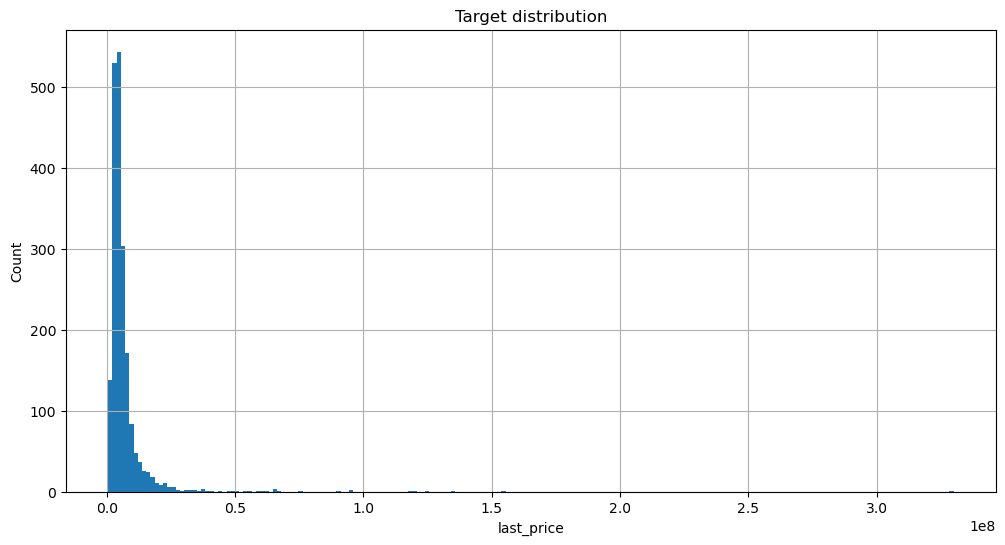

In [580]:
plt.figure(figsize = (12, 6))

df['last_price'][:2000].hist(bins=200)
plt.ylabel('Count')
plt.xlabel('last_price')

plt.title('Target distribution')
plt.show()

Не совсем информативный график, но все же видно, что основная цена продажи составляет около 4 млн.. Думаю лучше посмотреть на целевую переменную по годам.

In [581]:
df['year_exp'] = pd.DatetimeIndex(df['first_day_exposition']).year
df[['first_day_exposition', 'year_exp']].head()

,first_day_exposition,year_exp
0,2019-03-07,2019
1,2018-12-04,2018
2,2015-08-20,2015
3,2015-07-24,2015
4,2018-06-19,2018


In [582]:
df['year_exp'].unique()

array([2019, 2018, 2015, 2017, 2016, 2014], dtype=int64)

<AxesSubplot:xlabel='year_exp', ylabel='last_price'>

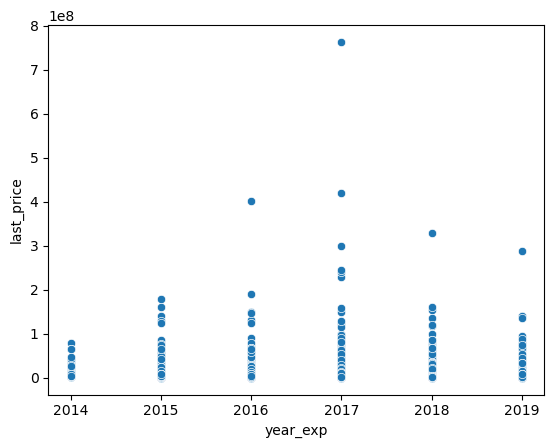

In [583]:
sns.scatterplot(data=df, x="year_exp", y="last_price")

По графику видно, что цены в основном увеличились, но не все! С 2015 года цены на квартиры равномерно распределены и это хорошо (модель будет давать более точные прогнозы). Еще хочется посмотреть на аномальную цену в 2017 году.

In [584]:
df.last_price.max()

763000000.0

In [585]:
df[df['last_price'] > 760000000] 
#df.query('last_price == "763000000.0"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year_exp
12971,19,763000000.0,400.0,2017-09-30,7,2.7,10.0,250.0,10,False,...,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0,2017


Стоимость судя по параметрам оказалась не аномальной. Оставим эту квартиру в покое и исследуем дальше...

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'first_day_exposition'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>],
       [<AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>,
        <AxesSubplot:title={'center':'year_exp

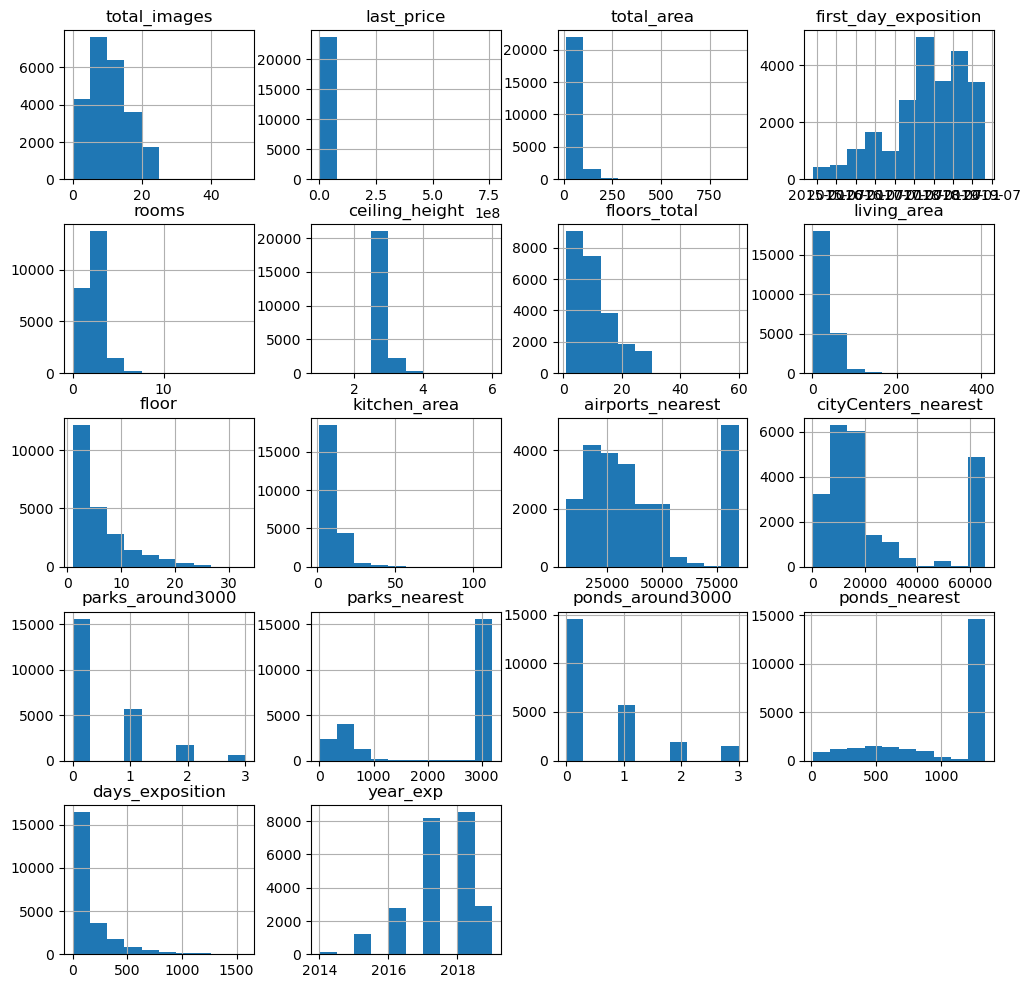

In [586]:
df.hist(figsize=(12, 12))

Ладно... Построю более детальные графики.

In [587]:
int_var = ['total_area', 'ceiling_height', 'living_area', 'kitchen_area', 'airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest', 'days_exposition', 'floors_total']

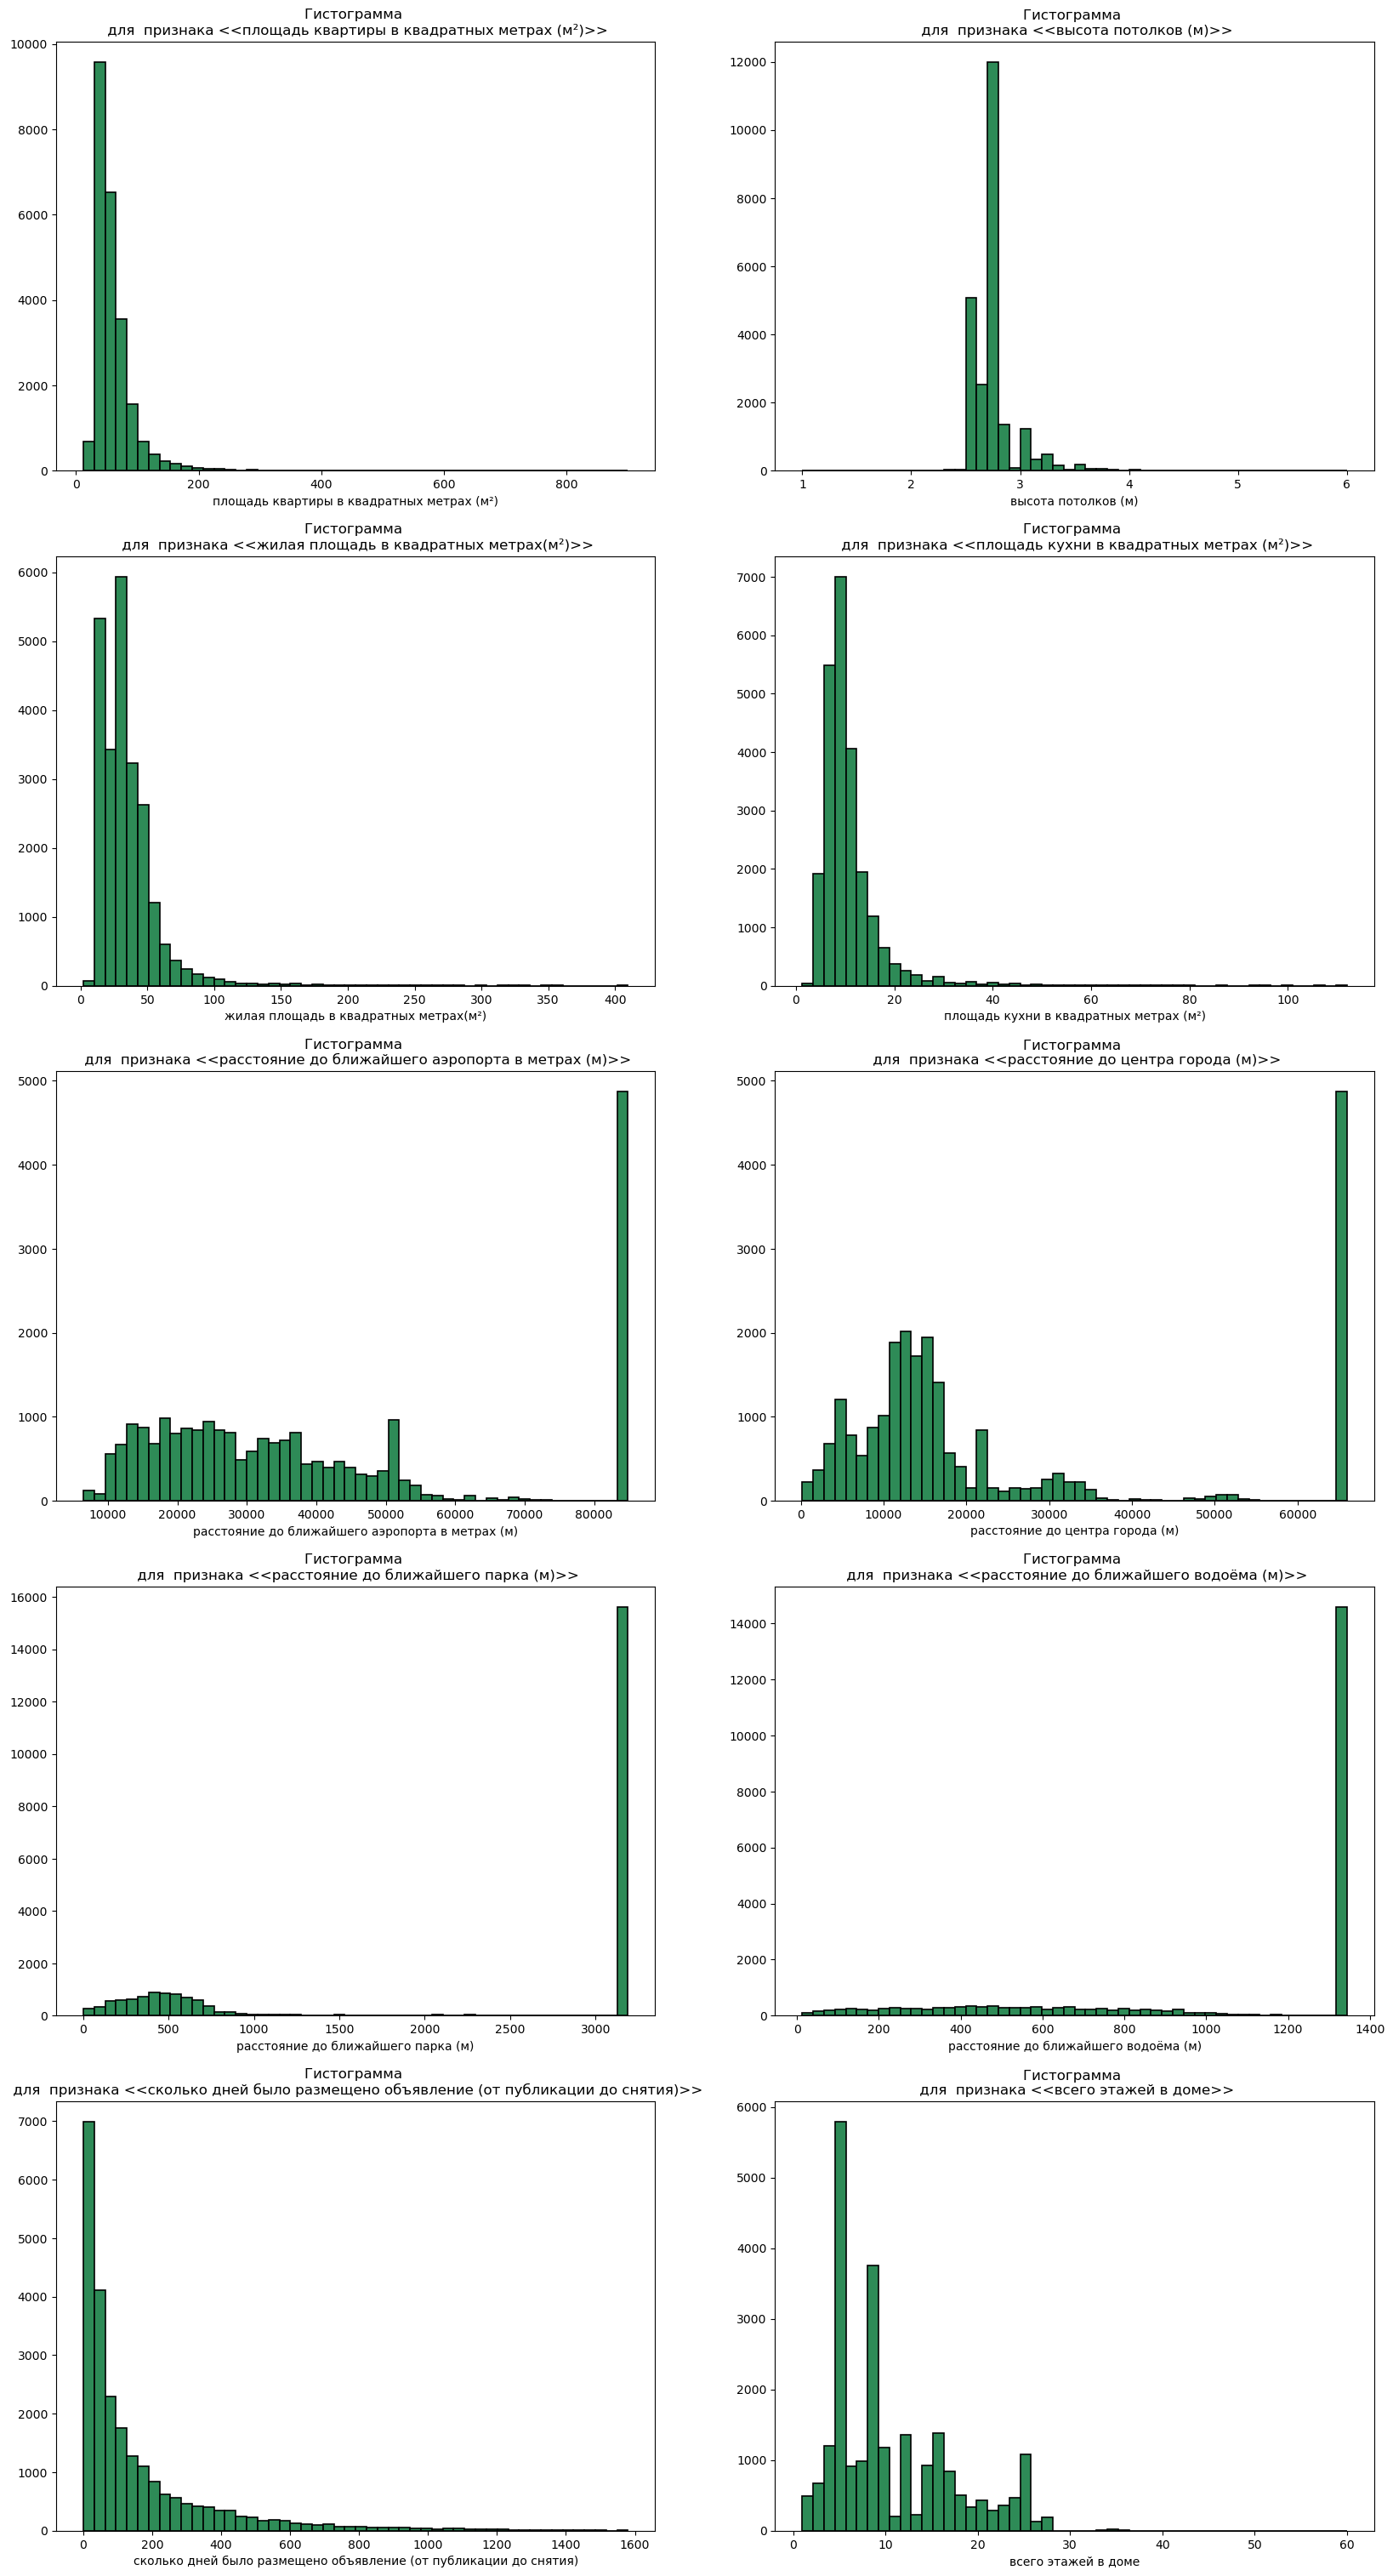

In [588]:
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize=(20,38))
i = 0
l = 0
j = 0
for i in range(5):
    for j in range(2):
        axes[i, j].hist(df[int_var[l]], bins = 50, color = "seagreen", edgecolor='black', linewidth=1.2)
        axes[i, j].set_title("Гистограмма \n для  признака <<{}>>".format(dict_to_rus[int_var[l]]))
        axes[i, j].set_xlabel(dict_to_rus[int_var[l]])
        l+=1

In [589]:
cat_var = ['balcony', 'floor', 'rooms', 'parks_around3000', 'ponds_around3000', 'total_images']

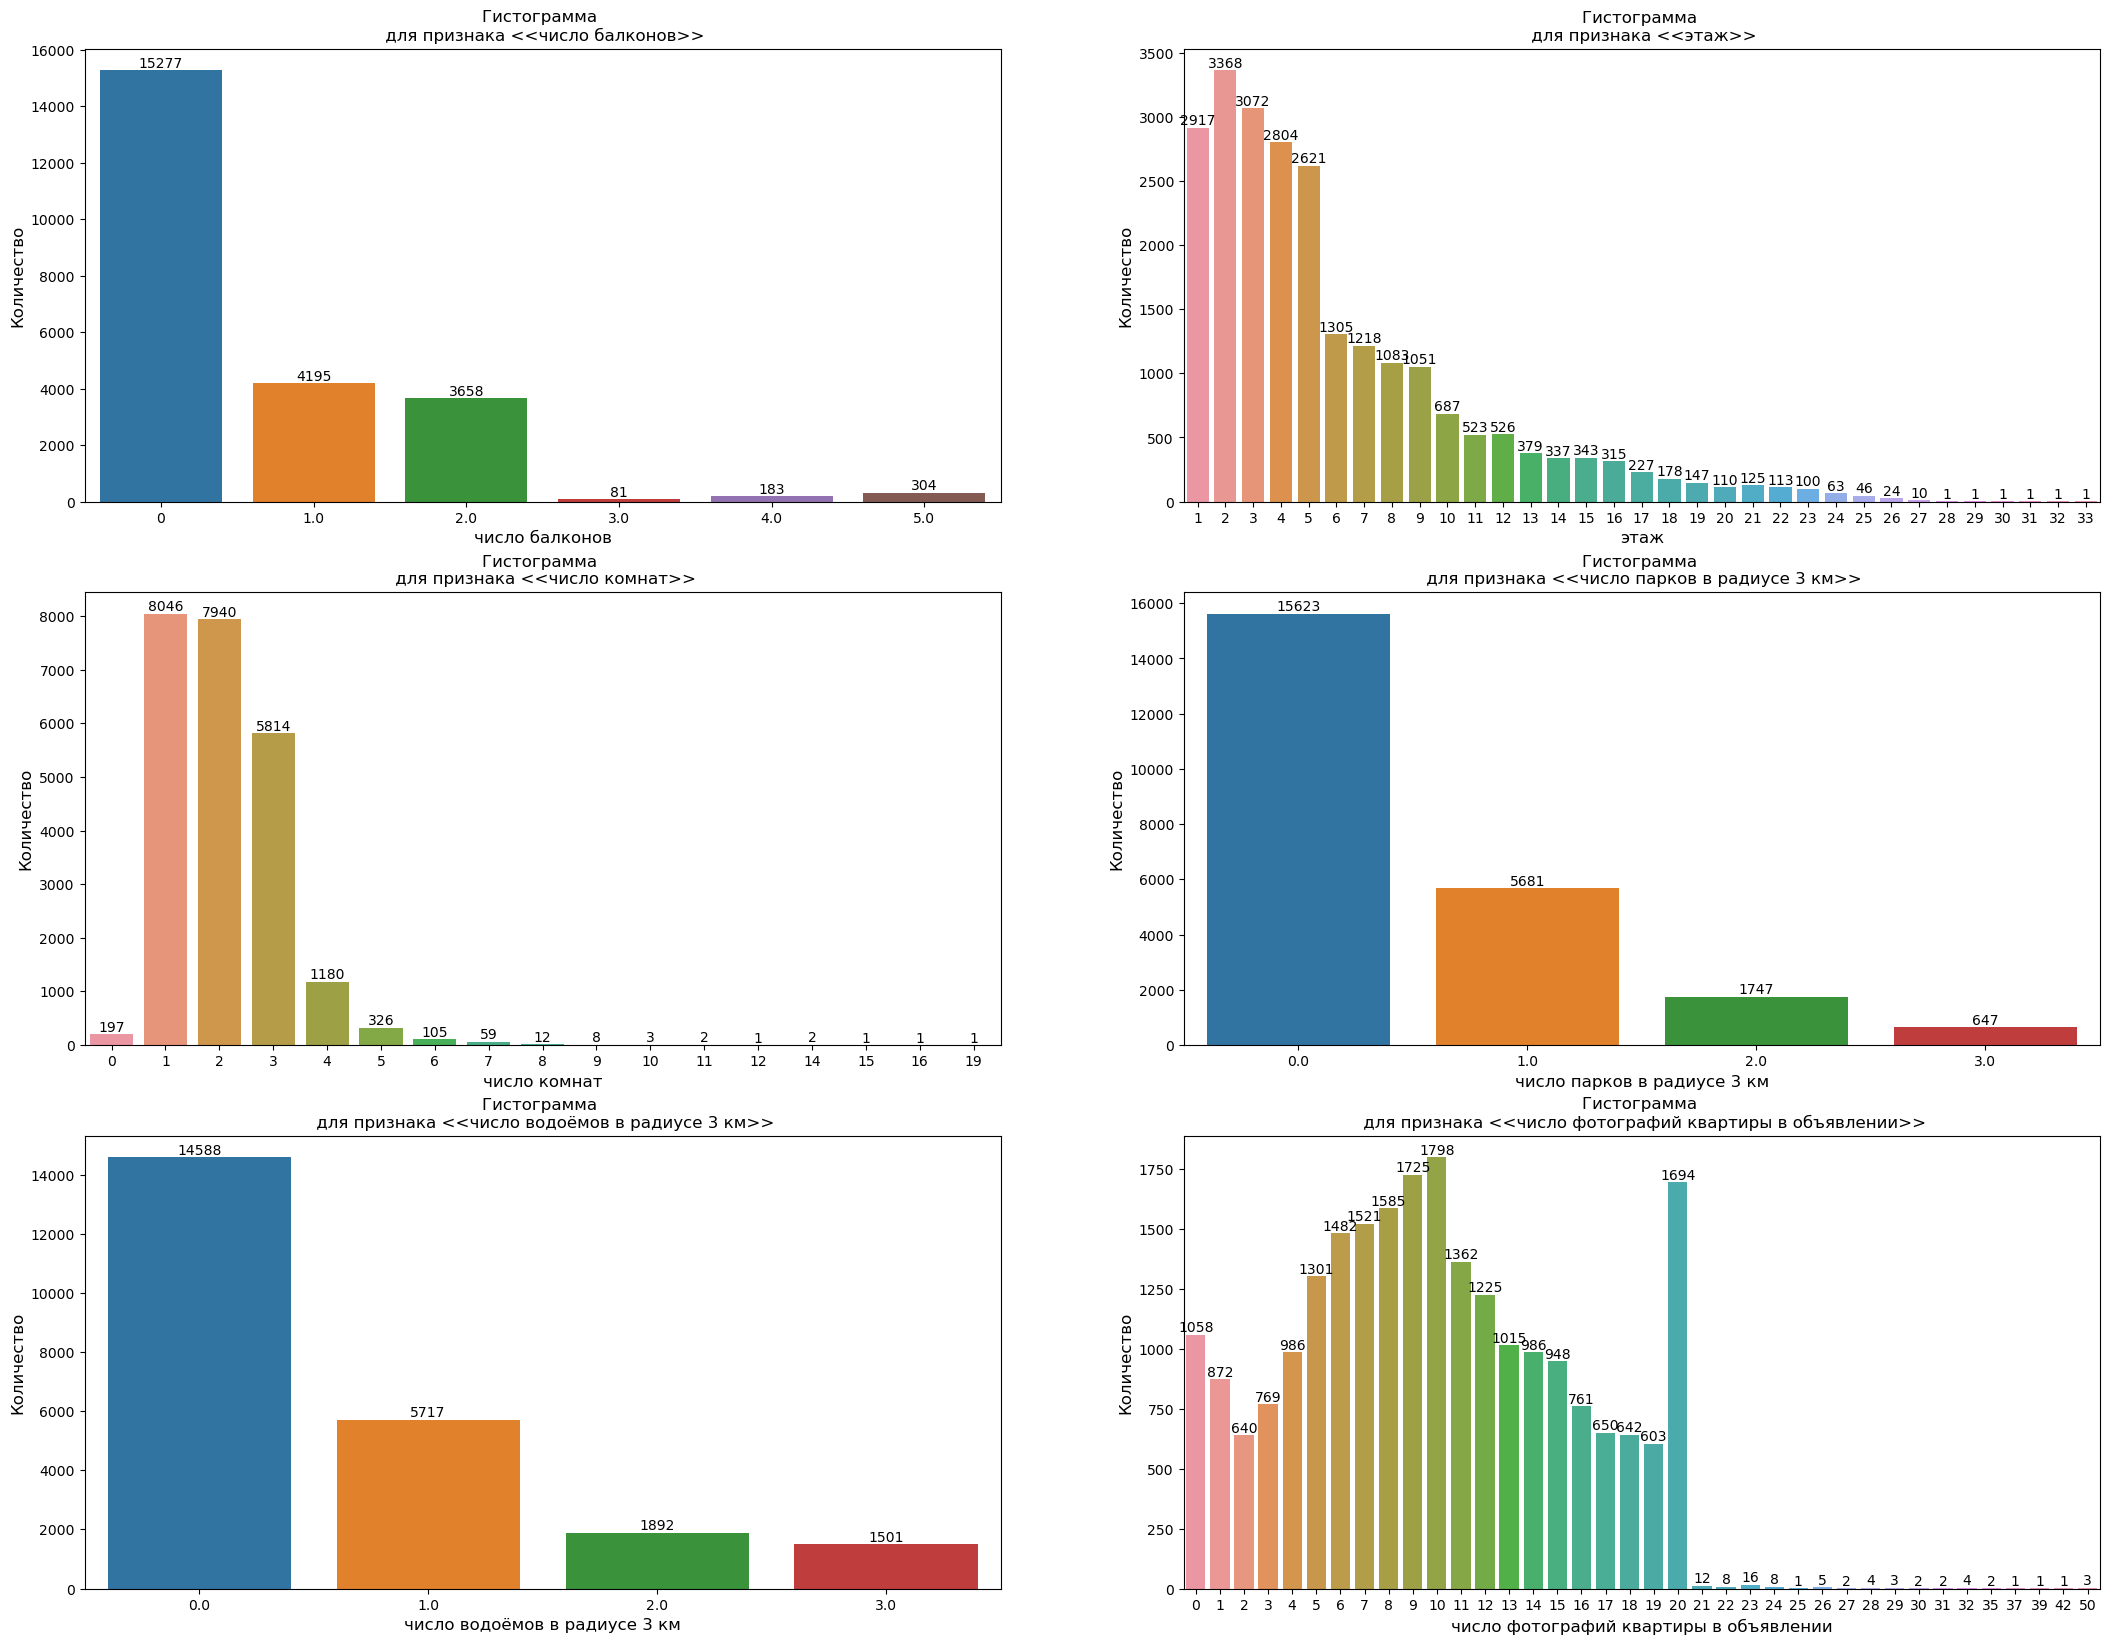

In [590]:
fig, axes = plt.subplots(3, sharey=True, figsize=(26,20))
i=0
for i, col in enumerate(cat_var):
    plt.subplot(3,2,i+1)
    ax = sns.countplot(x=col, data=df,)
    plt.title("Гистограмма \n для признака <<{}>>".format(dict_to_rus[col]))
    plt.xlabel(dict_to_rus[col], fontsize = 12)
    plt.ylabel('Количество', fontsize = 12)
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:d}'.format(p.get_height()), 
            (x.mean(), y),ha='center', va='bottom', fontsize = 10);

Сделаю промежуточные наброски по графикам:
   * пик продаваемых квартир был в 2018 году;
   * в основном количество дней размещения объявлений не превышало 100 дней;
   * основная часть продаваемой недвижимости была отдалена от парков и водоемов;
   * основная часть продаваемой недвижимости находится в близи от центра города, ну и внушительная часть находится далеко от центра города;
   * продаваемые квартиры в основном с небольшой площадью и со стандартной высотой потолков;
   * 2-х и однокомнатные квартиры самые популярные в продаже;
   * квартир находящихся до 5-го этажа больше всех из выборки выставленных на продажу;
   * в среденем публикуют около 10 фотографий квартир в объявлении;
   * основная часть продаваемой недвижимости отдалена от аэропорта.

Разобьем цену на категории для удобства в исследовании

In [591]:
def change(row):
    income = row['last_price']
    if income < 1000000.0:
        return 'до 1 млн'
    if 1000000.0 < income < 2000000.0:
        return 'от 1 до 2 млн'
    if 2000000.0 < income < 3000000.0:
        return 'от 2 до 3 млн'
    if 3000000.0 < income < 4000000.0:
        return 'от 3 до 4 млн'
    if 4000000.0 < income < 5000000.0:
        return 'от 4 до 5 млн'
    if 5000000.0 < income < 6000000.0:
        return 'от 5 до 6 млн'    
    if income > 7000000.0:
        return 'свыше 7 млн'  

In [592]:
df['category_price'] = df.apply(change, axis = 1)

In [593]:
df.groupby('category_price', as_index=False)[['last_price']]\
    .count().sort_values('last_price', ascending=False)\
    .style.bar()

,category_price,last_price
6,свыше 7 млн,5432
3,от 3 до 4 млн,4668
4,от 4 до 5 млн,4132
5,от 5 до 6 млн,2794
2,от 2 до 3 млн,2534
1,от 1 до 2 млн,1129
0,до 1 млн,225


In [594]:
df.last_price.median()

4650000.0

Больше всего объявлений лежит свыше 7 млн, а в среднем квартира стоит 4,5 млн. руб.

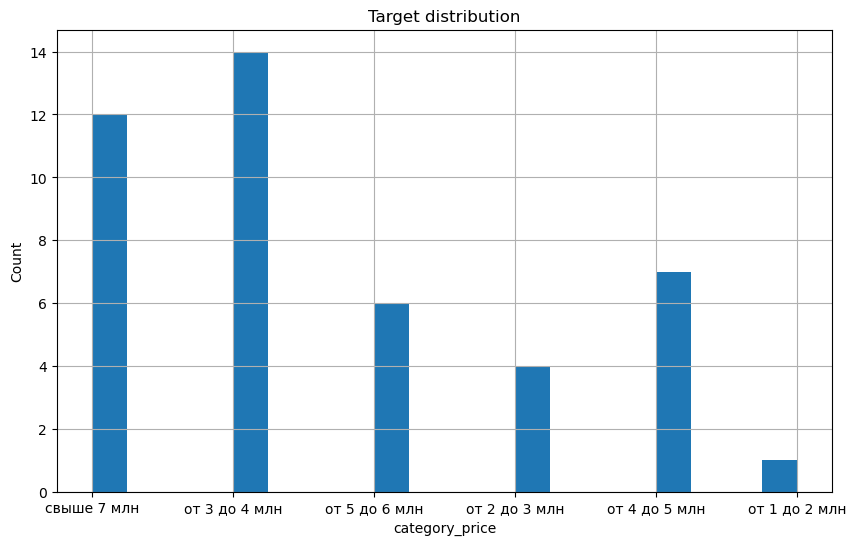

In [595]:
plt.figure(figsize = (10, 6))

df['category_price'][:50].hist(bins=20)
plt.ylabel('Count')
plt.xlabel('category_price')

plt.title('Target distribution')
plt.show()

А вот этот график показывает нам, что количество целевой переменной с ценой от 3 до 4 млн. больше... 

Посмотрим с какими признаками хорошо коррелирует целевая переменная и в последующем оставим их для решения задачи

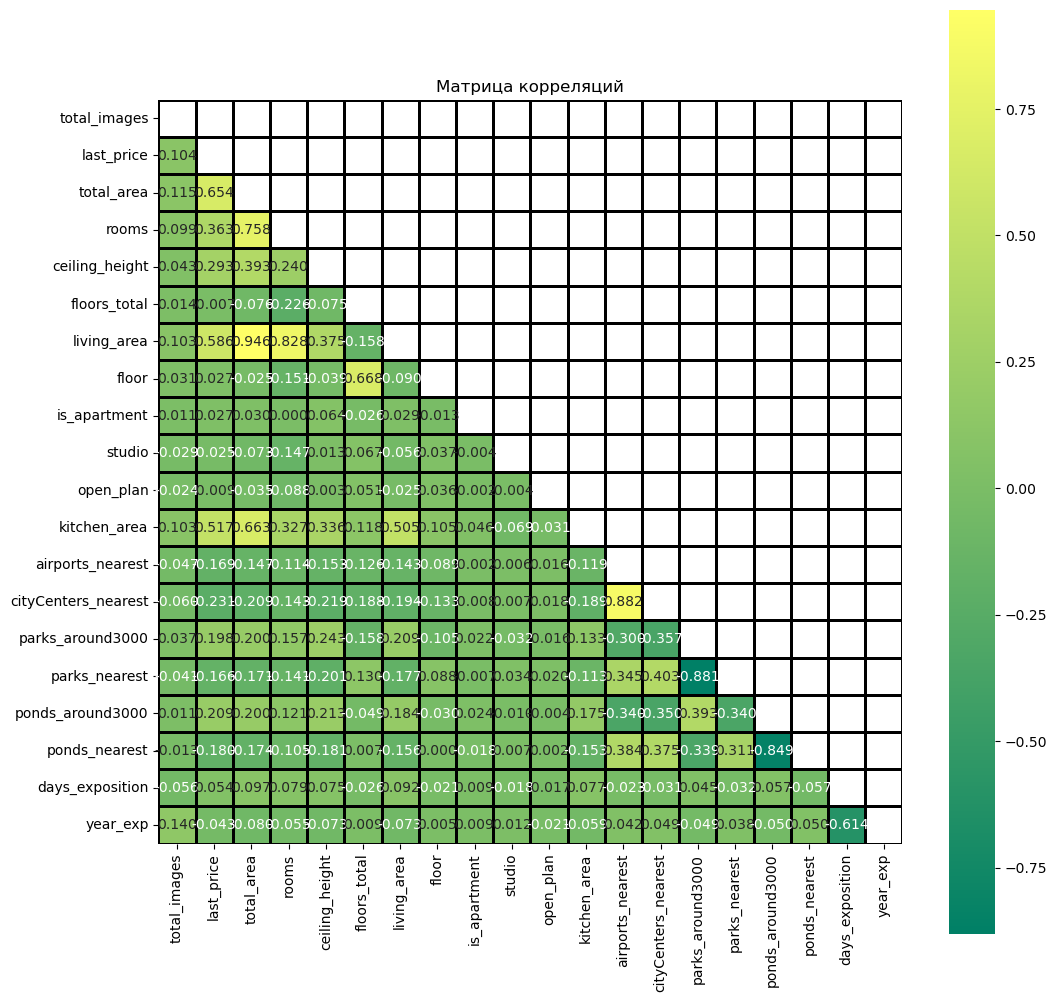

In [596]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(data = df.corr(), annot=True, square=True, 
            cmap='summer', fmt='.3f', linewidths=1, linecolor='black', mask=np.triu(df.corr()))
plt.title('Матрица корреляций')
plt.show()

Как видим с целевой переменной лучше всех коррелируют такие признаки как total_area, living_area и kitchen_area. Получается, цена квартиры зависит в основном от площади квартиры. Также есть небольшая зависимость цены на такие признаки как rooms (кол-во комнат), ceiling_height (высота потолков) и cityCenter_nearest (близость к центру города). 

С данными признаками будем работать, остальные уберем

In [597]:
remove = ['total_images', 'floors_total', 'floor', 'parks_nearest', 'ponds_around3000',\
             'ponds_nearest', 'is_apartment', 'studio',\
             'parks_around3000', 'open_plan', 'airports_nearest', 'days_exposition'] 
good_df = df[df.columns.difference(remove)]

In [598]:
good_df.head()

,balcony,category_price,ceiling_height,cityCenters_nearest,first_day_exposition,kitchen_area,last_price,living_area,locality_name,rooms,total_area,year_exp
0,0,свыше 7 млн,2.70,16028.0,2019-03-07,25.00,13000000.0,51.00,Санкт-Петербург,3,108.0,2019
1,2.0,от 3 до 4 млн,2.70,18603.0,2018-12-04,11.00,3350000.0,18.60,поселок Шушары,1,40.4,2018
2,0.0,от 5 до 6 млн,2.70,13933.0,2015-08-20,8.30,5196000.0,34.30,Санкт-Петербург,2,56.0,2015
3,0.0,свыше 7 млн,2.70,6800.0,2015-07-24,30.21,64900000.0,89.04,Санкт-Петербург,3,159.0,2015
4,0,свыше 7 млн,3.03,8098.0,2018-06-19,41.00,10000000.0,32.00,Санкт-Петербург,2,100.0,2018


In [599]:
good_df.describe()

,ceiling_height,cityCenters_nearest,kitchen_area,last_price,living_area,rooms,total_area,year_exp
count,23698.000000,23698.000000,23698.000000,2.369800e+04,23698.000000,23698.000000,23698.000000,23698.000000
mean,2.716188,25016.330271,10.587269,6.541529e+06,34.538874,2.070681,60.349733,2017.367120
std,0.218783,22177.944292,6.108796,1.088724e+07,22.306509,1.078405,35.654446,1.039785
min,1.000000,181.000000,1.300000,1.219000e+04,2.000000,0.000000,12.000000,2014.000000
25%,2.600000,10927.000000,7.000000,3.400000e+06,19.000000,1.000000,40.000000,2017.000000
50%,2.700000,14948.500000,9.100000,4.650000e+06,30.000000,2.000000,52.000000,2017.000000
75%,2.700000,31121.000000,12.000000,6.799750e+06,42.090000,3.000000,69.900000,2018.000000
max,6.000000,65968.000000,112.000000,7.630000e+08,409.700000,19.000000,900.000000,2019.000000


Интересно посмотреть, как влияет расстояние до центра города на цену квартиры 

In [600]:
Peter_town = good_df.query('locality_name == "Санкт-Петербург"')

In [601]:
Peter_town['center_city_km'] = Peter_town['cityCenters_nearest'] / 1000

C:\Users\User\AppData\Local\Temp\ipykernel_8340\3479708709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Peter_town['center_city_km'] = Peter_town['cityCenters_nearest'] / 1000


In [602]:
Peter_town['center_city_km'] = Peter_town.center_city_km.round(0)

C:\Users\User\AppData\Local\Temp\ipykernel_8340\490104960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Peter_town['center_city_km'] = Peter_town.center_city_km.round(0)


In [603]:
Peter_town_df = Peter_town.pivot_table(index='center_city_km', values='last_price', aggfunc='median')

<AxesSubplot:xlabel='center_city_km'>

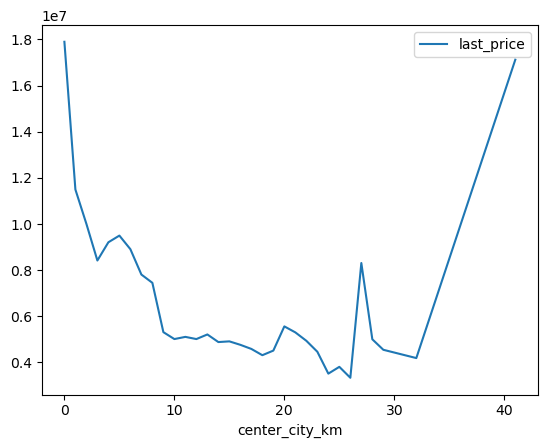

In [604]:
Peter_town_df.plot()

Данный график показывает, что цена становиться выше с уменьшением расстояния до центра. P.s.: на графике киллометраж после 30 не будем брать в расчет, т.к. увеличение цены после 30 км не информативно после очистки неизвестных данных в признаке cityCenter_nearest в пользу отдаленности от центра

Убедимся в этом глядя на таблицу топ-20 населенных пунктов в соотношении с ценой

In [605]:
top_20 = good_df.pivot_table(index='locality_name', values='last_price', aggfunc=['count', 'median', 'mean'])
top_20.columns = ('count', 'median', 'mean')

In [606]:
top_20.sort_values('count', ascending=False).head(20)

,count,median,mean
locality_name,,,
Санкт-Петербург,15769,5500000.0,8.058481e+06
поселок Мурино,556,3400000.0,3.652361e+06
поселок Шушары,440,3950000.0,4.108082e+06
Всеволожск,398,3450000.0,3.789068e+06
Пушкин,369,5180000.0,6.469036e+06
Колпино,338,3600000.0,3.964021e+06
поселок Парголово,327,4100000.0,4.488075e+06
Гатчина,307,3100000.0,3.488337e+06
деревня Кудрово,299,3790000.0,4.234158e+06


**Промежуточный вывод:**
   * В Санкт-Петербурге больше всех объявлений и дороже квартиры
   * Отдаленность от центра города влияет на цену
   * На цену квартиры сильно влияет ее площадь

Подготовлю данные для обучения (прогнозирование)

Сделаю отбор признаков

In [609]:
features = list(good_df.loc[::].corrwith(
    df['last_price']).abs().sort_values(ascending=False)[:].index)

#target = 'last_price'

In [610]:
good_df[features].head()

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,cityCenters_nearest,year_exp
0,13000000.0,108.0,51.00,25.00,3,2.70,16028.0,2019
1,3350000.0,40.4,18.60,11.00,1,2.70,18603.0,2018
2,5196000.0,56.0,34.30,8.30,2,2.70,13933.0,2015
3,64900000.0,159.0,89.04,30.21,3,2.70,6800.0,2015
4,10000000.0,100.0,32.00,41.00,2,3.03,8098.0,2018


In [611]:
from sklearn.preprocessing import StandardScaler

In [614]:
good_df = pd.DataFrame(good_df, columns=features)
good_df.head()

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,cityCenters_nearest,year_exp
0,13000000.0,108.0,51.00,25.00,3,2.70,16028.0,2019
1,3350000.0,40.4,18.60,11.00,1,2.70,18603.0,2018
2,5196000.0,56.0,34.30,8.30,2,2.70,13933.0,2015
3,64900000.0,159.0,89.04,30.21,3,2.70,6800.0,2015
4,10000000.0,100.0,32.00,41.00,2,3.03,8098.0,2018


Разбиение на train и test

In [628]:
X = good_df.drop(columns=target)
y = good_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True, random_state=21)

In [629]:
X.head()

,total_area,living_area,kitchen_area,rooms,ceiling_height,cityCenters_nearest,year_exp
0,108.0,51.00,25.00,3,2.70,16028.0,2019
1,40.4,18.60,11.00,1,2.70,18603.0,2018
2,56.0,34.30,8.30,2,2.70,13933.0,2015
3,159.0,89.04,30.21,3,2.70,6800.0,2015
4,100.0,32.00,41.00,2,3.03,8098.0,2018


In [630]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14218, 7), (9480, 7), (14218,), (9480,))

In [631]:
from sklearn.preprocessing import StandardScaler

In [632]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [633]:
rf_model = RandomForestRegressor(random_state=21, criterion='mse')
rf_model.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


RandomForestRegressor(criterion='mse', random_state=21)

In [634]:
def optimizing_df(df):
    for col in df.columns:
        if df[col].dtypes.kind == 'i' or df[col].dtypes.kind == 'u':
            if df[col].min() >= 0:
                df[col] = pd.to_numeric(df[col], downcast='unsigned')
            else:
                df[col] = pd.to_numeric(df[col], downcast='integer')

        elif df[col].dtypes.kind == 'f' or df[col].dtypes.kind == 'c':
            df[col] = pd.to_numeric(df[col], downcast='float')

        elif df[col].dtypes.kind == 'O':
            num_unique_values = len(df[col].unique())
            num_total_values = len(df[col])
            if num_unique_values / num_total_values < 0.5:
                df[col] = df[col].astype('category')

    return df

In [635]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

Train R2:	0.943
Test R2:	0.376


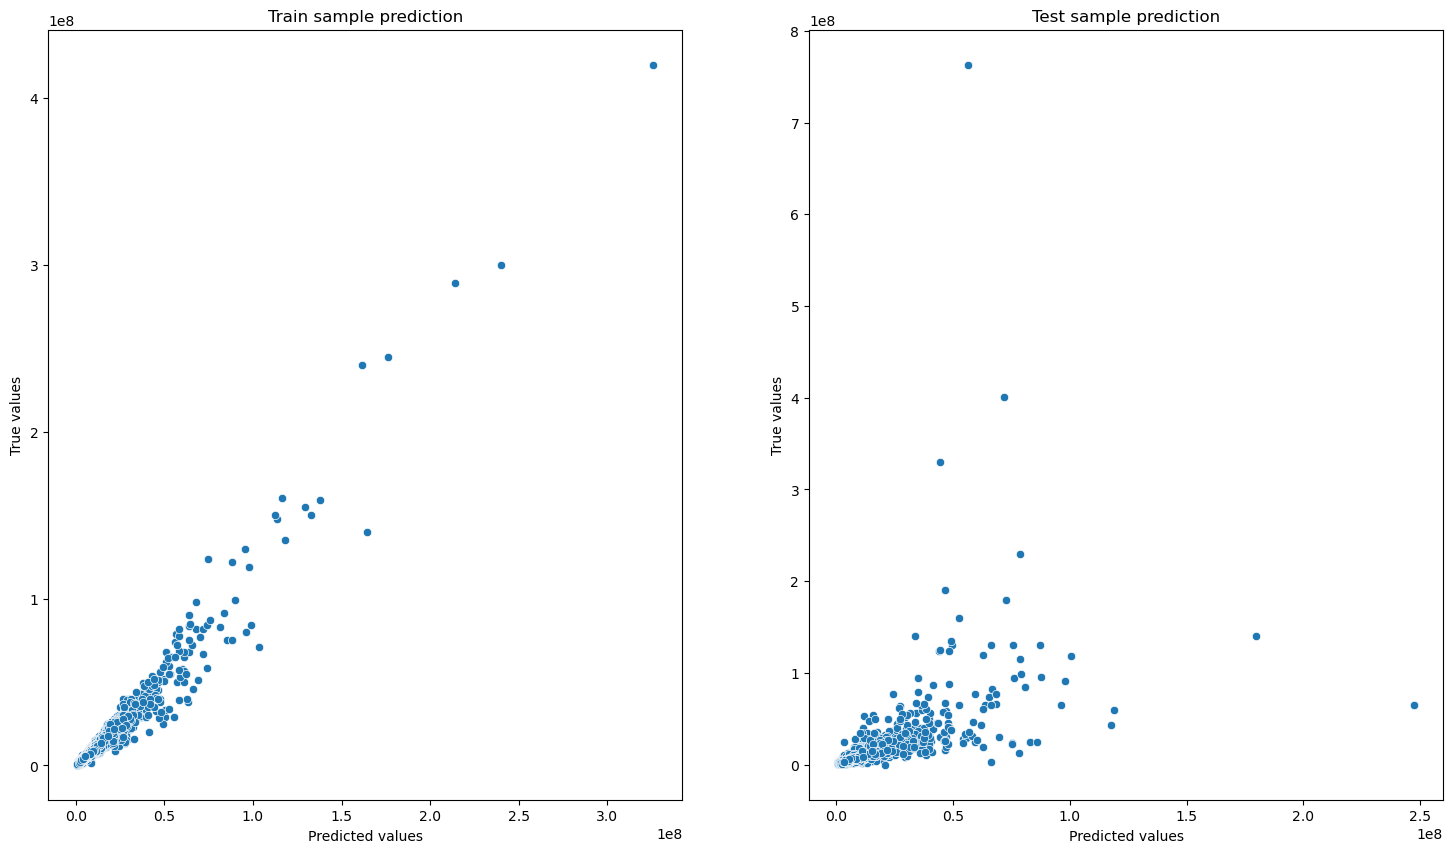

In [636]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_test)

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

Судя по результатам обученной модели мне нужно тренироваться в борьбе переобучения и недообучения модели ((

Важность признаков

In [637]:
feature_importances = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
0,total_area,0.582311
1,living_area,0.123535
5,cityCenters_nearest,0.121011
2,kitchen_area,0.066767
3,rooms,0.043955
4,ceiling_height,0.043543
6,year_exp,0.018878
